In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
G = nx.Graph()

edges = [
    (0,1),
    (0,2),
    (0,3),
    (0,4),
    (1,2),
    (1,3),
    (1,4),
    (2,3),
    (2,4),
    (3,4),

    (5,6),
    (5,7),
    (5,8),
    (5,9),
    (6,7),
    (6,8),
    (6,9),
    (7,8),
    (7,9),
    (8,9),

    (10,11),
    (10,12),
    (10,13),
    (11,12),
    (11,13),
    (12,13),

    (0,5),
    (1,10),
    (2,10),
    (6,11),    
]

G.add_edges_from(edges)

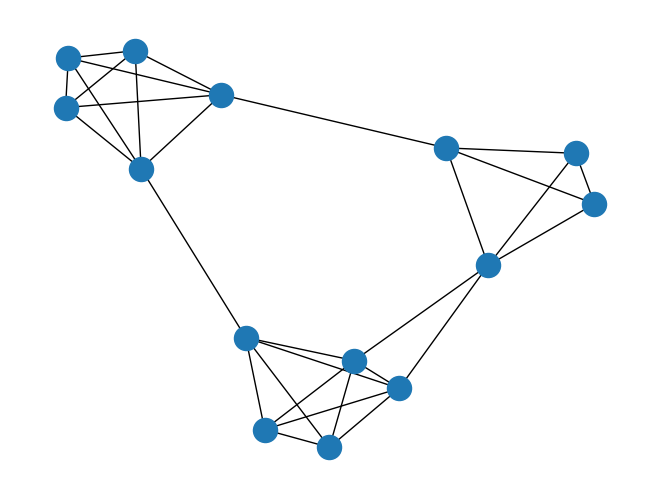

In [5]:
pos = nx.spring_layout(G)

plt.figure()
nx.draw(G, pos=pos)
plt.show() # 3 groups visible, communities, some nodes more tightly linked/related to each other, acting/behaving more similarly; detection

In [6]:
# get colors
community_colors = []
for i in range(14):
    if (i<5):
        community_colors.append("C0")
    elif (i<10):
        community_colors.append("C1")
    else:
        community_colors.append("C2")

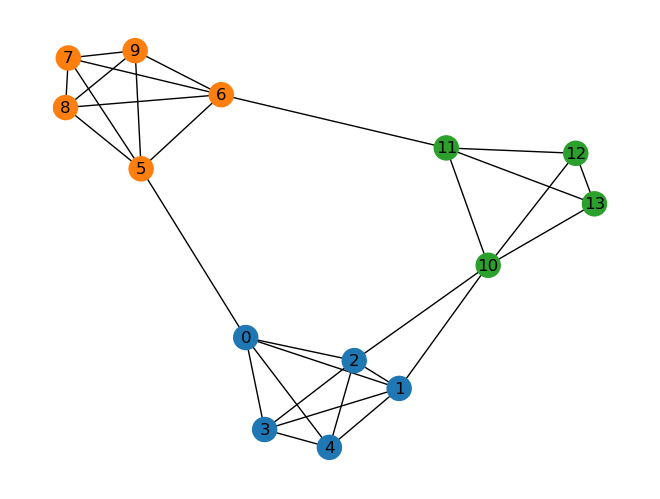

In [7]:
plt.figure()
nx.draw(G, pos=pos, node_color=community_colors, with_labels=True)
plt.show()
# eg crime, selling products, websites, drugs/diseases

In [8]:
# Basic hypotheses in community detection:
# 1. Fundamental hypothesis: A network's community structure is uniquely encoded in its wiring diagram
# intuition: nodes and edges and their connectivity is enough to undestand which nodes are in a community
# 2. Connectedness and density hypothesis: A community is a locally dense connected subgraph in a network
# intuition: community in friendship network eg high school friends, university friends etc - do not exactly know each other
# 3. Random hypothesis: Randomly wired networks lack an inherent community structure
# intuition: there is a probability that some nodes will be tightly linked together, randomly, we can estimate this probability; a community structure we want to detect should be stronger in that sense than what occurs randomly
# 4. Maximal Modularity Hypothesis: For a given network the partition with maximum modularity corresponds to the optimal community structure
# intuition: ? later

In [9]:
# detection algorithms
import itertools

In [10]:
# Girvan-Newman algorithm
# taking adjacency matrix, not by looking
# for a community expect many edges internally and few edges between different communities
# betweenness of a node - how often a node is located on a shortest path between pair of nodes
# edge betweenness - rare links between communities will have many shortest paths between nodes from different communities going through them
# calculate edge betweennes for all edges, cut the one with highest, recalculate, cut the highest again etc

comp = nx.community.girvan_newman(G)
k = 3 # n of iterations, leads to different partitions
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) # partition

# could be suboptimal, determining the level of how deep we want to go

([0, 1, 2, 3, 4, 10, 11, 12, 13], [5, 6, 7, 8, 9])
([0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13])


In [11]:
# Louvain
# Infomap

In [12]:
# checking found communities (whether we got good partitions)
# calculating the modularity - measure of how tightely groups of nodes are linked together compared to what could happen at random
# communities should be more tight than what would randomly occur
# calculate modularity of partition in two steps 
# 1. for a particular community: density of links (number of links in community / total links) - connectivity
# expected in a random graph (avg? degree in community / 2* total links) squared
# 2. summing up the Mc for all communities

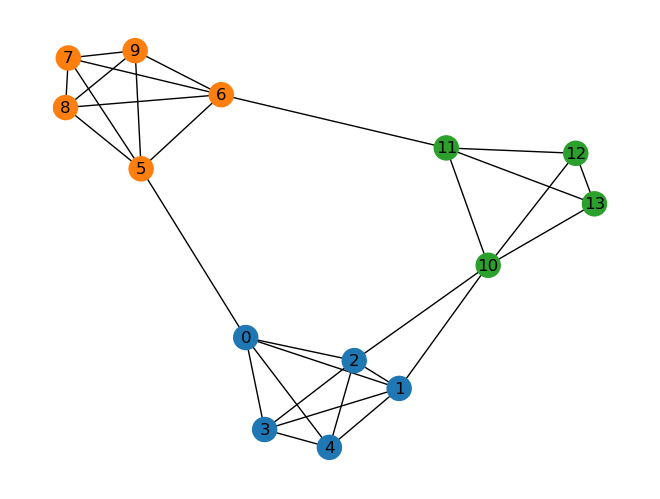

In [13]:
plt.figure()
nx.draw(G, pos=pos, node_color=community_colors, with_labels=True)
plt.show()

In [14]:
# for one big network (no partition)
print("zeroth level..", nx.community.modularity(G, [{0,1,2,3,4,10,11,12,13,5,6,7,8,9}]))
# we get 0 meaning this group is less connected than we would expect at random

zeroth level.. 0.0


In [15]:
# communities suggested by Girvan-Newman
print("first level..", nx.community.modularity(G, [{0,1,2,3,4,10,11,12,13}, {5,6,7,8,9}]))
print("second level..", nx.community.modularity(G, [{0,1,2,3,4},{10,11,12,13}, {5,6,7,8,9}]))
# the higher positive number, the more valuable partition

first level.. 0.3977777777777778
second level.. 0.5227777777777778


In [16]:
# completely different partition 
print("zeroth level..", nx.community.modularity(G, [{0,1,2,4,10,11,12,5,6,8,9}, {3,13,7}]))

zeroth level.. -0.06722222222222227


In [17]:
# algorithms aiming at maximizing this measure exist